# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [81]:
# Import the appropriate libraries
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Create two new dataframes
data1= pd.read_csv('NorthCallCenter.csv')
data2= pd.read_csv('SouthCallCenter.csv')
data1



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [82]:
data2

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

Q1

In [83]:
# Put your EDA code here
data1["Rep ID"].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [84]:
data2["Rep ID"].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

Q2

In [85]:
data1[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]] .mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [86]:
data2[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]] .mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

Q3

In [87]:
data1.groupby("Time Block")["Calls"].count()

Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64

In [88]:
data2.groupby("Time Block")["Calls"].count()

Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

#note of result
1_There are 9 reps in North branch and 11 reps in south branch
2_ for north the average
Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347

for south the average
Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433

3_ the number of calls taken in north

10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5

the number of calls taken in south
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [89]:
# Clean your data here
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [90]:
data1= data1.drop(columns=["Unnamed: 0"])

In [91]:
data2= data2.drop(columns=["Unnamed: 0"])

In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 26.9+ KB


In [93]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 314 non-null    object 
 1   Call Purpose           314 non-null    object 
 2   Time Block             314 non-null    object 
 3   Incoming or Outgoing   314 non-null    object 
 4   Queue                  314 non-null    object 
 5   Rep ID                 314 non-null    object 
 6   Sale                   314 non-null    object 
 7   Lost Call              314 non-null    int64  
 8   Abandoned              314 non-null    int64  
 9   Busy Minutes           314 non-null    int64  
 10  Not Ready Minutes      314 non-null    int64  
 11  Incoming Wait Time     126 non-null    float64
 12  During Call Wait Time  314 non-null    int64  
 13  Calls                  314 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 34.5+ KB


In [94]:
data1.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [95]:
data2['Incoming Wait Time'] = data2['Incoming Wait Time'].fillna(0)

In [96]:
data1["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [97]:
data2["Sale"].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [98]:
data1.loc[data1["Sale"].value_counts()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
234,North,Product Support,4:00 PM,Outgoing,B,Todd,NO,0,0,11,2,NaN,3,1
10,North,Product Support,4:00 PM,Incoming,A,Joe,NO,0,0,11,3,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1


In [99]:
data1["Sale"]

0        NO
1        NO
2        NO
3        NO
4        NO
5        NO
6        NO
7        NO
8        NO
9        NO
10       NO
11       NO
12       NO
13       NO
14       NO
15       NO
16       NO
17       NO
18       NO
19     YES 
20       NO
21       NO
22       NO
23       NO
24       NO
25       NO
26       NO
27       NO
28       NO
29       NO
30       NO
31       NO
32       NO
33       NO
34       NO
35       NO
36       NO
37       NO
38       NO
39       NO
40      YES
41       NO
42       NO
43       NO
44       NO
45       NO
46       NO
47      YES
48       NO
49       NO
50       NO
51       NO
52       NO
53       NO
54       NO
55       NO
56       NO
57       NO
58       NO
59       NO
60       NO
61       NO
62       NO
63       NO
64       NO
65       NO
66       NO
67      YES
68       NO
69      YES
70       NO
71       NO
72       NO
73       NO
74       NO
75       NO
76       NO
77       NO
78       NO
79       NO
80       NO
81       NO
82       NO
83  

In [100]:
data1.loc[data1["Sale"]!="NO"]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1


In [101]:
data1["Sale"].replace({"YES ":"YES"},inplace=True)

In [102]:
data1["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [103]:
data2["Sale"].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [104]:
data1.drop_duplicates(keep="first").shape

(243, 14)

In [105]:
data2.loc[data2.duplicated(keep=False) ,:]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
57,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
166,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,0.0,2,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,0.0,2,1
175,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,0.0,4,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,0.0,4,1


In [106]:
data2.drop_duplicates(keep="first").shape

(311, 14)

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

note of results:
1_ yes,all of null places correspond to outgoing calls.
2_there is spaces in other yes so i replace the third yes with the similar yes.
3_ yes, thereare duplicates in the two data sets , i drpped them and kept the first.
4_there is column "Unnamed: 0" i dropped it in both data sets.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [107]:
# Manipulate data here

In [108]:
df =data1.append (data2)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1


In [109]:
gr = df.groupby('Rep ID').sum()
gr

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Alice,0,0,199,46,15.0,58,20
Amanda,0,1,229,43,12.0,60,23
Andy,0,3,228,43,36.0,65,23
Brent,0,1,362,71,17.0,117,37
Cam,1,0,233,46,32.0,66,24
Duke,2,0,292,56,39.0,85,29
Eric,0,0,361,54,47.0,112,35
George,0,0,298,53,41.0,87,29
Helga,0,2,292,58,36.0,95,31


In [110]:
sort_values = gr.sort_values(by=["Calls"], ascending = False)
sort_values

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
Lilly,0,2,307,59,37.0,88,30
Todd,1,0,296,58,21.0,97,29
Duke,2,0,292,56,39.0,85,29
George,0,0,298,53,41.0,87,29


#The average call abandonment rate

In [111]:
abandonment_rates_for_North = {}
queues = ["A", "B"]
queue_dict = data1.groupby("Queue").agg("sum")
for i in range(2):
    abandonment_rates_for_North[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

In [112]:
queue_dict

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,
A,1,4,946,181,116.0,272,96
B,4,3,1501,288,134.0,455,149


In [113]:
abandonment_rates_for_North 

{'A': 0.041666666666666664, 'B': 0.020134228187919462}

In [114]:
0.041666666666666664+0.020134228187919462

0.061800894854586126

In [115]:
0.061800894854586126/2*100

3.0900447427293063

In [116]:
abandonment_rates_for_South= {}
queues = ["C", "D"]
queue_dict = data2.groupby("Queue").agg("sum")
for i in range(2):
    abandonment_rates_for_South[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

In [117]:
queue_dict

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,
C,4,1,1409,251,160.0,435,138
D,7,3,1748,349,218.0,531,176


In [118]:
abandonment_rates_for_South

{'C': 0.007246376811594203, 'D': 0.017045454545454544}

In [119]:
(0.007246376811594203+0.017045454545454544)/2*100

1.2145915678524375

In [120]:
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

In [121]:
queue_dict

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,
A,1,4,946,181,116.0,272,96
B,4,3,1501,288,134.0,455,149
C,4,1,1409,251,160.0,435,138
D,7,3,1748,349,218.0,531,176


In [122]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [123]:
(0.041666666666666664+  0.020134228187919462+ 0.007246376811594203+0.017045454545454544)/4*100

2.152318155290872

#Service level_for_north = Calls within 2 secs / total calls

In [124]:
quick_calls_north = data1[data1["Incoming Wait Time"] <= 2.0]
quick_reps_north = quick_calls_north[["Rep ID", "Calls"]]
quick_stats_north = quick_reps.groupby(["Rep ID"]).sum() 

In [125]:
quick_reps_north = quick_calls_north[["Rep ID", "Calls"]]
quick_reps_north

,Rep ID,Calls
0,Brent,1
1,Cam,1
2,Todd,1
3,Brent,1
4,Brent,1
5,Duke,1
6,Joe,1
7,Lilly,1
8,Duke,1
9,Cam,1


In [126]:
quick_stats_north = quick_reps_north .groupby(["Rep ID"]).sum()
quick_stats_north

,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


In [127]:
total_calls_in_north = data1[data1["Incoming or Outgoing"] == "Incoming"]
total_calls_in_north


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [128]:
rep_calls_north = total_calls_in_north[["Rep ID", "Calls"]]   
rep_calls_north


,Rep ID,Calls
0,Brent,1
1,Cam,1
2,Todd,1
3,Brent,1
4,Brent,1
5,Duke,1
6,Joe,1
7,Lilly,1
8,Duke,1
9,Cam,1


In [129]:
total_stats_north = rep_calls_north.groupby(["Rep ID"]).sum()
total_stats_north

,Calls
Rep ID,
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Joe,10
Lilly,12
Todd,6
Xander,6


In [130]:
service_level = pd.merge(quick_stats_north, total_stats_north, on="Rep ID")

# Percentage 
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [131]:
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [132]:
service_level["Service Level %"]

Rep ID
Amanda    60.000000
Andy      30.000000
Brent     75.000000
Cam       45.454545
Duke      42.857143
Joe       20.000000
Lilly     33.333333
Todd      33.333333
Xander    33.333333
Name: Service Level %, dtype: float64

In [133]:
quick_calls_for_South = data2[data2["Incoming Wait Time"] <= 2.0]
quick_calls_for_South

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [134]:
quick_reps_South = quick_calls_for_South[["Rep ID", "Calls"]]
quick_stats_South = quick_reps_South.groupby(["Rep ID"]).sum() 

In [135]:
quick_reps_South

,Rep ID,Calls
0,Kate,1
1,Eric,1
2,Susan,1
3,Alice,1
4,Sandy,1
5,Karl,1
6,Sandy,1
7,Sandy,1
8,Randy,1
9,George,1


In [136]:
quick_stats_South

,Calls
Rep ID,
Alice,17
Eric,27
George,20
Helga,23
Josh,19
Karl,22
Kate,21
Randy,24
Sandy,26


In [141]:
total_calls_in_south= data2[data2["Incoming or Outgoing"] == "Incoming"]
total_calls_in_south



,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [151]:
rep_calls_South = total_calls_in_south[["Rep ID", "Calls"]]     
rep_calls_South

,Rep ID,Calls
0,Kate,1
1,Eric,1
2,Susan,1
3,Alice,1
4,Sandy,1
5,Karl,1
6,Sandy,1
7,Sandy,1
8,Randy,1
9,George,1


In [152]:
total_stats_south = rep_calls_South.groupby(["Rep ID"]).sum()
total_stats_south

,Calls
Rep ID,
Alice,6
Eric,18
George,13
Helga,11
Josh,9
Karl,9
Kate,11
Randy,16
Sandy,13


In [155]:
service_level_south = pd.merge(quick_stats_South, total_stats_south, on="Rep ID")
service_level_south

,Calls_x,Calls_y
Rep ID,,
Alice,17,6
Eric,27,18
George,20,13
Helga,23,11
Josh,19,9
Karl,22,9
Kate,21,11
Randy,24,16
Sandy,26,13


In [156]:
service_level_south["Service Level %"] = service_level_south["Calls_x"]/service_level_south["Calls_y"] * 100
service_level_south

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Alice,17,6,283.333333
Eric,27,18,150.000000
George,20,13,153.846154
Helga,23,11,209.090909
Josh,19,9,211.111111
Karl,22,9,244.444444
Kate,21,11,190.909091
Randy,24,16,150.000000
Sandy,26,13,200.000000


In [157]:
service_level_South = pd.merge(quick_stats_South, total_stats_south , on="Rep ID")

# Percentage 
service_level_South["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100




In [158]:
service_level_South = pd.merge(quick_stats_South, total_stats_south , on="Rep ID")
service_level_South

,Calls_x,Calls_y
Rep ID,,
Alice,17,6
Eric,27,18
George,20,13
Helga,23,11
Josh,19,9
Karl,22,9
Kate,21,11
Randy,24,16
Sandy,26,13


service_level for all company:

In [159]:
quick_calls_df = df[df["Incoming Wait Time"] <= 2.0]


In [160]:
quick_reps_df = quick_calls_df[["Rep ID", "Calls"]]
quick_reps_df

,Rep ID,Calls
0,Brent,1
1,Cam,1
2,Todd,1
3,Brent,1
4,Brent,1
5,Duke,1
6,Joe,1
7,Lilly,1
8,Duke,1
9,Cam,1


In [161]:
quick_stats_df = quick_reps_df.groupby(["Rep ID"]).sum() 
quick_stats_df

,Calls
Rep ID,
Alice,17
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Eric,27
George,20
Helga,23


In [162]:
total_calls_df = df[df["Incoming or Outgoing"] == "Incoming"]


In [163]:
rep_calls_df = total_calls_df[["Rep ID", "Calls"]]     


In [164]:
total_stats_df = rep_calls_df.groupby(["Rep ID"]).sum


In [165]:
service_level_df = pd.merge(quick_stats_df, total_calls_df, on="Rep ID")
service_level_df

,Rep ID,Calls_x,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls_y
0,Alice,17,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,12,1,1.0,3,1
1,Alice,17,South,Product Support,5:00 PM,Incoming,C,NO,0,0,11,3,1.0,3,1
2,Alice,17,South,Product Support,5:00 PM,Incoming,C,NO,0,0,10,3,2.0,4,1
3,Alice,17,South,Sales Support,1:00 PM,Incoming,C,NO,0,0,8,2,3.0,3,1
4,Alice,17,South,Product Support,10:00 AM,Incoming,C,NO,0,0,10,3,3.0,2,1
5,Alice,17,South,Complaint,2:00 PM,Incoming,C,NO,0,0,11,3,5.0,3,1
6,Amanda,3,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
7,Amanda,3,North,Product Support,12:00 PM,Incoming,A,NO,0,0,11,1,2.0,3,1
8,Amanda,3,North,Product Support,1:00 PM,Incoming,A,NO,0,0,8,2,2.0,3,1
9,Amanda,3,North,Sales Support,10:00 AM,Incoming,A,NO,0,0,9,2,3.0,3,1


In [166]:
service_level_df["service_level_df %"] = service_level_df["Calls_x"]/service_level_df["Calls_y"] * 100
service_level_df["service_level_df %"] 

0      1700.0
1      1700.0
2      1700.0
3      1700.0
4      1700.0
5      1700.0
6       300.0
7       300.0
8       300.0
9       300.0
10      300.0
11      300.0
12      300.0
13      300.0
14      300.0
15      300.0
16      300.0
17      300.0
18      300.0
19      300.0
20      300.0
21      600.0
22      600.0
23      600.0
24      600.0
25      600.0
26      600.0
27      600.0
28      600.0
29      500.0
30      500.0
31      500.0
32      500.0
33      500.0
34      500.0
35      500.0
36      500.0
37      500.0
38      500.0
39      500.0
40      600.0
41      600.0
42      600.0
43      600.0
44      600.0
45      600.0
46      600.0
47      600.0
48      600.0
49      600.0
50      600.0
51      600.0
52      600.0
53      600.0
54     2700.0
55     2700.0
56     2700.0
57     2700.0
58     2700.0
59     2700.0
60     2700.0
61     2700.0
62     2700.0
63     2700.0
64     2700.0
65     2700.0
66     2700.0
67     2700.0
68     2700.0
69     2700.0
70     2700.0
71    

 what is the average speed of answer

In [167]:
north_plt = data1.groupby("Rep ID")["Incoming Wait Time"].mean()
north_plt

Rep ID
Amanda    2.400000
Andy      3.600000
Brent     2.125000
Cam       2.909091
Duke      2.785714
Joe       3.600000
Lilly     3.083333
Todd      3.500000
Xander    3.333333
Name: Incoming Wait Time, dtype: float64

In [168]:
south_plt = data2.groupby("Rep ID")["Incoming Wait Time"].mean()
south_plt

Rep ID
Alice     0.750000
Eric      1.342857
George    1.413793
Helga     1.161290
Josh      1.192308
Karl      0.928571
Kate      1.275862
Randy     1.424242
Sandy     1.062500
Sharon    1.160000
Susan     1.346154
Name: Incoming Wait Time, dtype: float64

In [169]:
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean()
df_speed_of_answer

Rep ID
Alice     0.750000
Amanda    2.400000
Andy      3.600000
Brent     2.125000
Cam       2.909091
Duke      2.785714
Eric      1.342857
George    1.413793
Helga     1.161290
Joe       3.600000
Josh      1.192308
Karl      0.928571
Kate      1.275862
Lilly     3.083333
Randy     1.424242
Sandy     1.062500
Sharon    1.160000
Susan     1.346154
Todd      3.500000
Xander    3.333333
Name: Incoming Wait Time, dtype: float64

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

note:
1_ Brent in north has  the highest number of calls in north branch.and Eric has  the highest number of calls in south.
2_abandonment rate
FOR NORTH= 3.0900447427293063
FOR SOUTH = 1.2145915678524375
FOR BOTH = 2.152318155290872
YES,north falls out of  range of 2-5%.
3_Service level
Amanda    60.000000
Andy      30.000000
Brent     75.000000
Cam       45.454545
Duke      42.857143
Joe       20.000000
Lilly     33.333333
Todd      33.333333
Xander    33.333333

Amanda    2.400000
Andy      3.600000
Brent     2.125000
Cam       2.909091
Duke      2.785714
Joe       3.600000
Lilly     3.083333
Todd      3.500000
Xander    3.333333
df=
Alice     0.750000
Eric      1.342857
George    1.413793
Helga     1.161290
Josh      1.192308
Karl      0.928571
Kate      1.275862
Randy     1.424242
Sandy     1.062500
Sharon    1.160000
Susan     1.346154
Alice     0.750000
Amanda    2.400000
Andy      3.600000
Brent     2.125000
Cam       2.909091
Duke      2.785714
Eric      1.342857
George    1.413793
Helga     1.161290
Joe       3.600000
Josh      1.192308
Karl      0.928571
Kate      1.275862
Lilly     3.083333
Randy     1.424242
Sandy     1.062500
Sharon    1.160000
Susan     1.346154
Todd      3.500000
Xander    3.333333


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [170]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [171]:
queue_dict

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,
A,1,4,946,181,116.0,272,96
B,4,3,1501,288,134.0,455,149
C,4,1,1409,251,160.0,435,138
D,7,3,1748,349,218.0,531,176


In [172]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

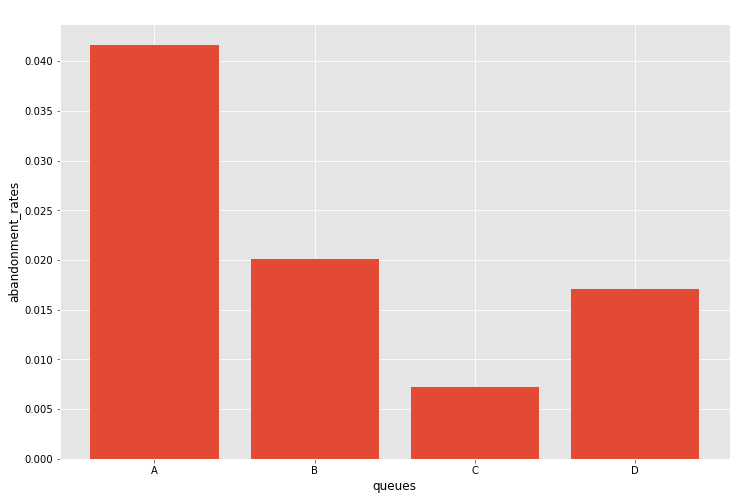

In [173]:
x = list(abandonment_rates.keys())
y = list(abandonment_rates.values())
plt.bar(x,y)
plt.title('the average abandonment rate per queue',color = 'white')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('queues',color = 'black')
plt.ylabel('abandonment_rates',color = 'black')
plt.show()

In [174]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = data1.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
df_speed_of_answer
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = data1[data1["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = data1[data1["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [175]:
north_plt = data1.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
df_speed_of_answer

,Incoming Wait Time
Rep ID,
Alice,0.750000
Amanda,2.400000
Andy,3.600000
Brent,2.125000
Cam,2.909091
Duke,2.785714
Eric,1.342857
George,1.413793
Helga,1.161290


In [176]:
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [177]:
north_plt

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


NameError: name 'north_plt1' is not defined

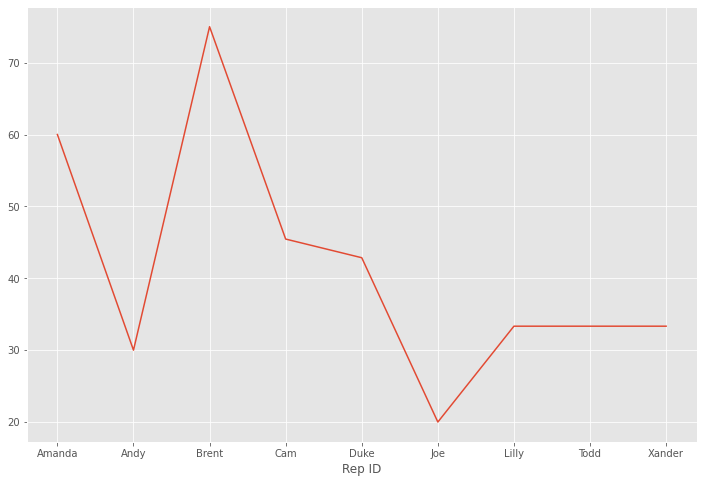

In [178]:
service_level["Service Level %"].plot(kind="line")
north_plt1.plot(kind="line")
plt.title(' the service level and average speed of answer per each rep',color = 'white')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')

plt.show()

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 559 non-null    object 
 1   Call Purpose           559 non-null    object 
 2   Time Block             559 non-null    object 
 3   Incoming or Outgoing   559 non-null    object 
 4   Queue                  559 non-null    object 
 5   Rep ID                 559 non-null    object 
 6   Sale                   559 non-null    object 
 7   Lost Call              559 non-null    int64  
 8   Abandoned              559 non-null    int64  
 9   Busy Minutes           559 non-null    int64  
 10  Not Ready Minutes      559 non-null    int64  
 11  Incoming Wait Time     396 non-null    float64
 12  During Call Wait Time  559 non-null    int64  
 13  Calls                  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 65.5+ KB


In [180]:
purpose_group = df.groupby("Call Purpose")
purpose_group.first()

,Branch,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Call Purpose,,,,,,,,,,,,,
Complaint,North,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
Product Support,North,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
Sales Support,North,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1


In [181]:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

In [182]:
purpose_group = df.groupby("Call Purpose")
purpose_group.first()

,Branch,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Call Purpose,,,,,,,,,,,,,
Complaint,North,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
Product Support,North,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
Sales Support,North,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1


In [183]:
call_purposes = ("Complaint","Product Support","Sales Support")
call_purposes

('Complaint', 'Product Support', 'Sales Support')

In [184]:
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
purpose_counts

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64

In [185]:
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

In [186]:
complaints

{'Incoming': 51}

In [187]:
sales_support

{'Outgoing': 123, 'Incoming': 75}

In [188]:
product_support

{'Outgoing': 228, 'Incoming': 82}

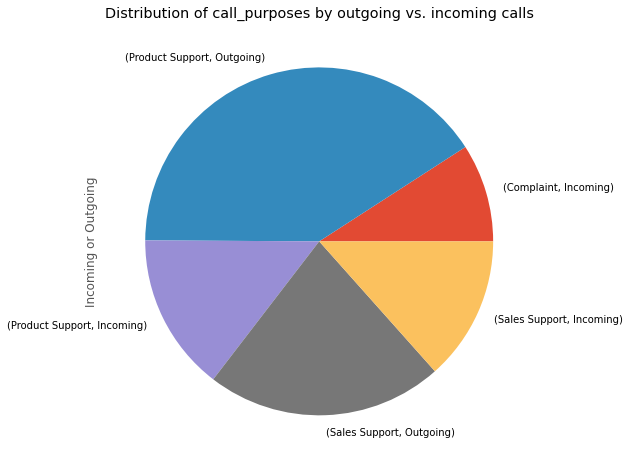

In [189]:
ax=purpose_counts.plot(kind='pie')
ax.set_title("Distribution of call_purposes by outgoing vs. incoming calls" )
plt.show()






### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

# note
 
Since abandonment rate in North is higher than south and service level is low so south work more
efficiently than north

in my opinion south branch ork so quickly.

in complaints there are Incoming': 51, in sales_support there are 'Outgoing': 123, 'Incoming': 75} and in product_support there are Outgoing': 228, 'Incoming': 82 .


## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times


In [ ]:
df["Time Block"]=pd.to_datetime(df["Time Block"])

In [ ]:
# Use groupby to plot based on time blocks:
time_blocks_plt = call_times.groupby(["Time Block"])["Incoming or Outgoing","Calls"]

In [ ]:
df["Time Block"]=list(df["Time Block"])

In [ ]:
time_blocks_plt.first()

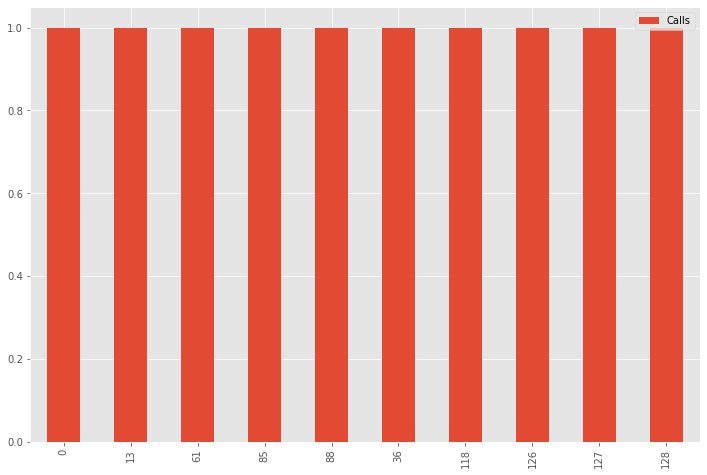

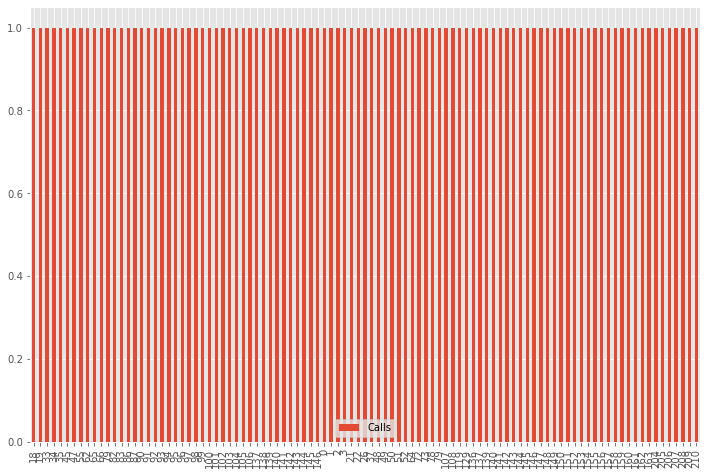

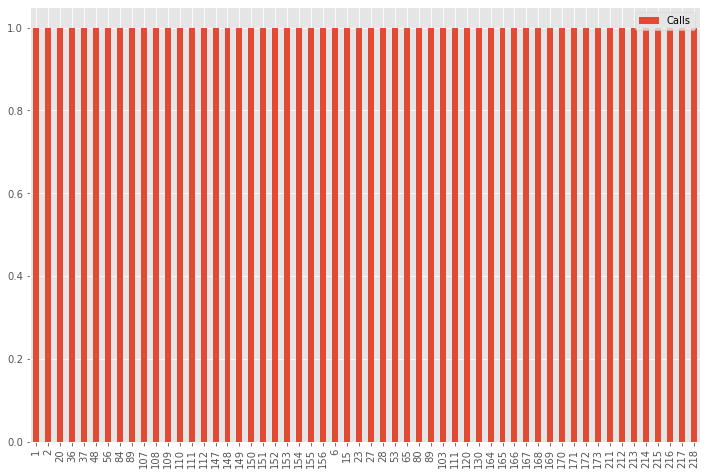

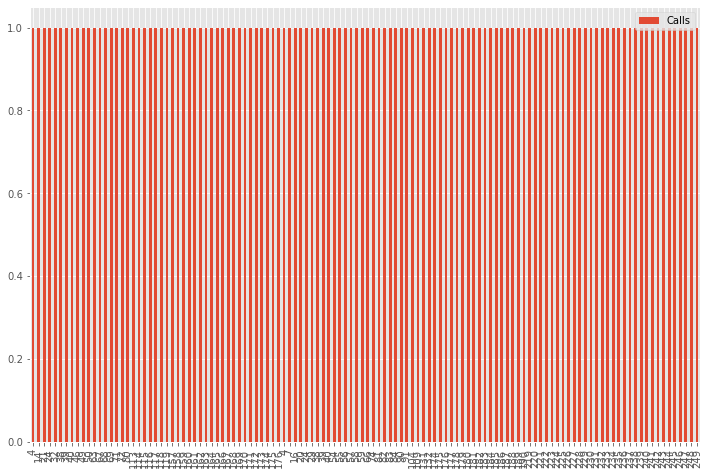

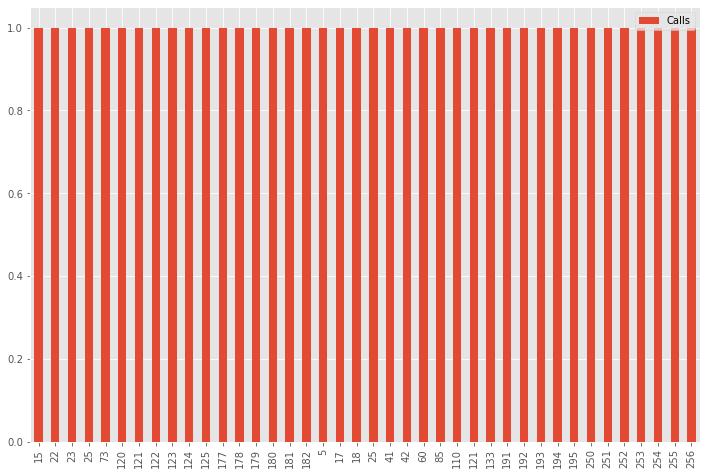

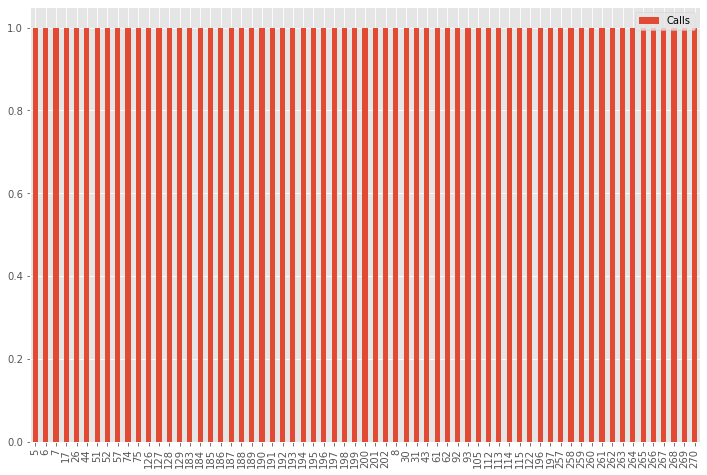

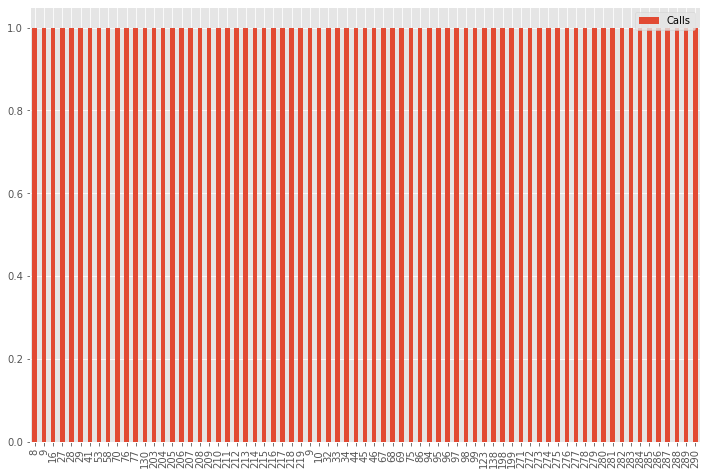

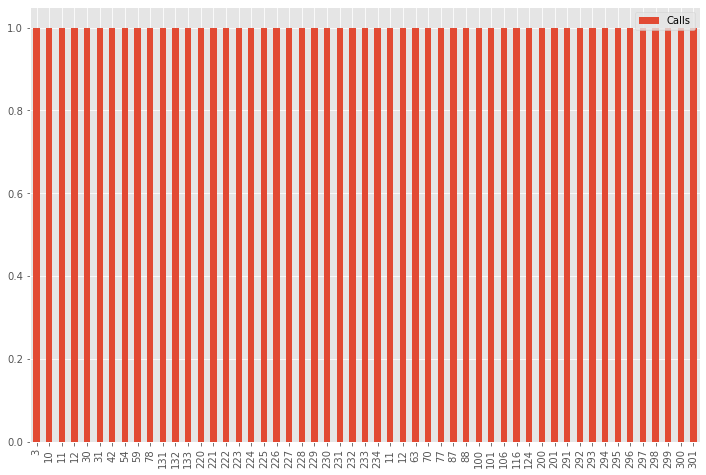

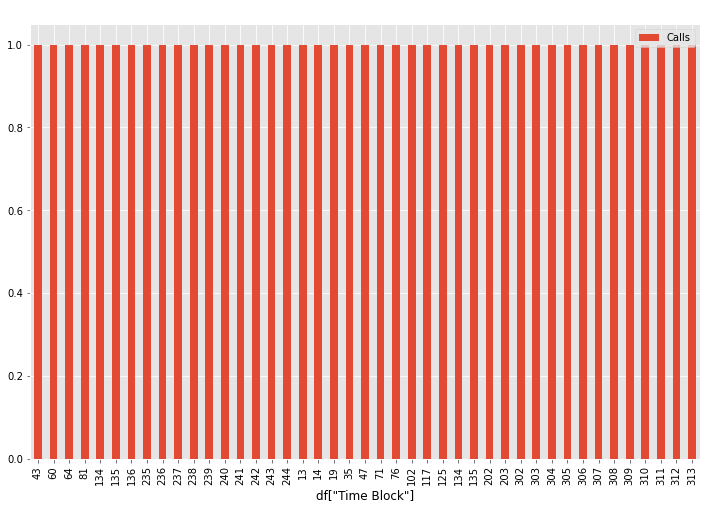

In [154]:
time_blocks_plt.plot(kind="bar")
plt.title(' the service level and average speed of answer per each rep',color = 'white')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('df["Time Block"]',color = 'black')

plt.show()